In [45]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'Big_Cities_Health_Data_Inventory.csv'  
data = pd.read_csv(file_path)



Here we display the first few rows of the loaded DataFrame using data.head(). This action provides a quick overview of the dataset, including the names of columns and some initial values, helping us understand the structure and type of data available for analysis.

In [46]:
# Display the first few rows of the dataframe
print("First few rows of the dataset:")
print(data.head())



First few rows of the dataset:
  Indicator Category                                          Indicator  Year  \
0           HIV/AIDS           AIDS Diagnoses Rate (Per 100,000 people)  2013   
1           HIV/AIDS           AIDS Diagnoses Rate (Per 100,000 people)  2012   
2           HIV/AIDS           AIDS Diagnoses Rate (Per 100,000 people)  2011   
3             Cancer  All Types of Cancer Mortality Rate (Age-Adjust...  2013   
4             Cancer  All Types of Cancer Mortality Rate (Age-Adjust...  2013   

   Gender Race/ Ethnicity  Value                        Place  \
0    Both             All   30.4  Atlanta (Fulton County), GA   
1    Both             All   39.6  Atlanta (Fulton County), GA   
2    Both             All   41.7  Atlanta (Fulton County), GA   
3    Male             All  195.8  Atlanta (Fulton County), GA   
4  Female             All  135.5  Atlanta (Fulton County), GA   

                          BCHC Requested Methodology  \
0  AIDS cases diagnosed in 2012, 20

Here we execute data.info() to display the DataFrame's structure, including the data type and count of non-null values for each column. This step is vital for identifying missing values and understanding the dataset's completeness, which influences decisions regarding data cleaning and preparation.

In [47]:
# Display the structure and summary of the dataset
print("\nData Types and Missing Values:")
data.info()




Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13512 entries, 0 to 13511
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Indicator Category          13512 non-null  object 
 1   Indicator                   13512 non-null  object 
 2   Year                        13512 non-null  object 
 3   Gender                      13512 non-null  object 
 4   Race/ Ethnicity             13512 non-null  object 
 5   Value                       13499 non-null  float64
 6   Place                       13512 non-null  object 
 7   BCHC Requested Methodology  13004 non-null  object 
 8   Source                      11222 non-null  object 
 9   Methods                     4232 non-null   object 
 10  Notes                       3541 non-null   object 
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


Here we generate summary statistics for numerical and categorical columns using data.describe() for numerical data and data.describe(include='object') for categorical data. These statistics, including measures like mean, standard deviation, quartiles, and frequency counts, help us identify trends, outliers, and data distribution.

In [48]:
# Summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(data.describe())

# Summary statistics for categorical columns
print("\nSummary Statistics for Categorical Columns:")
print(data.describe(include='object'))




Summary Statistics for Numerical Columns:
              Value
count  13499.000000
mean     285.688562
std     3192.666847
min        0.000000
25%        7.000000
50%       16.100000
75%       45.200000
max    80977.000000

Summary Statistics for Categorical Columns:
       Indicator Category                                          Indicator  \
count               13512                                              13512   
unique                 11                                                 44   
top              HIV/AIDS  Persons Living with HIV/AIDS Rate (Per 100,000...   
freq                 2177                                                623   

         Year Gender Race/ Ethnicity        Place  \
count   13512  13512           13512        13512   
unique     13      3               9           29   
top      2012   Both             All  Phoenix, AZ   
freq     3950   9409            5757          772   

                               BCHC Requested Methodology  \
coun

Here we filter the dataset for HIV/AIDS-related indicators while excluding entries where the race/ethnicity category is 'All'. This filtered data, stored in hiv_data_race, is prepared for creating visualizations that specifically focus on the distribution of HIV/AIDS rates among different races/ethnicities. We also preview this filtered data to verify the correctness of our filtering.

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Filter data for HIV/AIDS related indicators and exclude the 'all' category in race/ethnicity for the pie chart
hiv_data_race = data[(data['Indicator Category'] == 'HIV/AIDS') & (data['Race/ Ethnicity'] != 'All')]

# Preview the filtered data to verify correctness
hiv_data_race.head()


,Indicator Category,Indicator,Year,Gender,Race/ Ethnicity,Value,Place,BCHC Requested Methodology,Source,Methods,Notes
108,HIV/AIDS,HIV-Related Mortality Rate (Age-Adjusted; Per ...,2012,Both,Black,19.4,"Atlanta (Fulton County), GA","2012, 2013, 2014; per 100,000 population using...",Online Analytical Statistical Information Syst...,NaN,NaN
109,HIV/AIDS,HIV-Related Mortality Rate (Age-Adjusted; Per ...,2011,Both,Black,22.2,"Atlanta (Fulton County), GA","2012, 2013, 2014; per 100,000 population using...",Online Analytical Statistical Information Syst...,NaN,NaN
110,HIV/AIDS,HIV-Related Mortality Rate (Age-Adjusted; Per ...,2013,Both,Black,17.9,"Atlanta (Fulton County), GA","2012, 2013, 2014; per 100,000 population using...",Online Analytical Statistical Information Syst...,NaN,NaN
111,HIV/AIDS,HIV-Related Mortality Rate (Age-Adjusted; Per ...,2011,Both,White,2.7,"Atlanta (Fulton County), GA","2012, 2013, 2014; per 100,000 population using...",Online Analytical Statistical Information Syst...,NaN,NaN
112,HIV/AIDS,HIV-Related Mortality Rate (Age-Adjusted; Per ...,2013,Both,White,1.5,"Atlanta (Fulton County), GA","2012, 2013, 2014; per 100,000 population using...",Online Analytical Statistical Information Syst...,NaN,NaN


Here we set up a 2x2 grid for pie charts to visualize the distribution of HIV/AIDS indicators by race/ethnicity. For each indicator, we group the data by 'Race/ Ethnicity', calculate the mean values, and plot a pie chart on the respective subplot. We use plt.get_cmap('Pastel1') to ensure the colors are visually appealing. This layout allows for a comparative analysis across different indicators in a consolidated view.



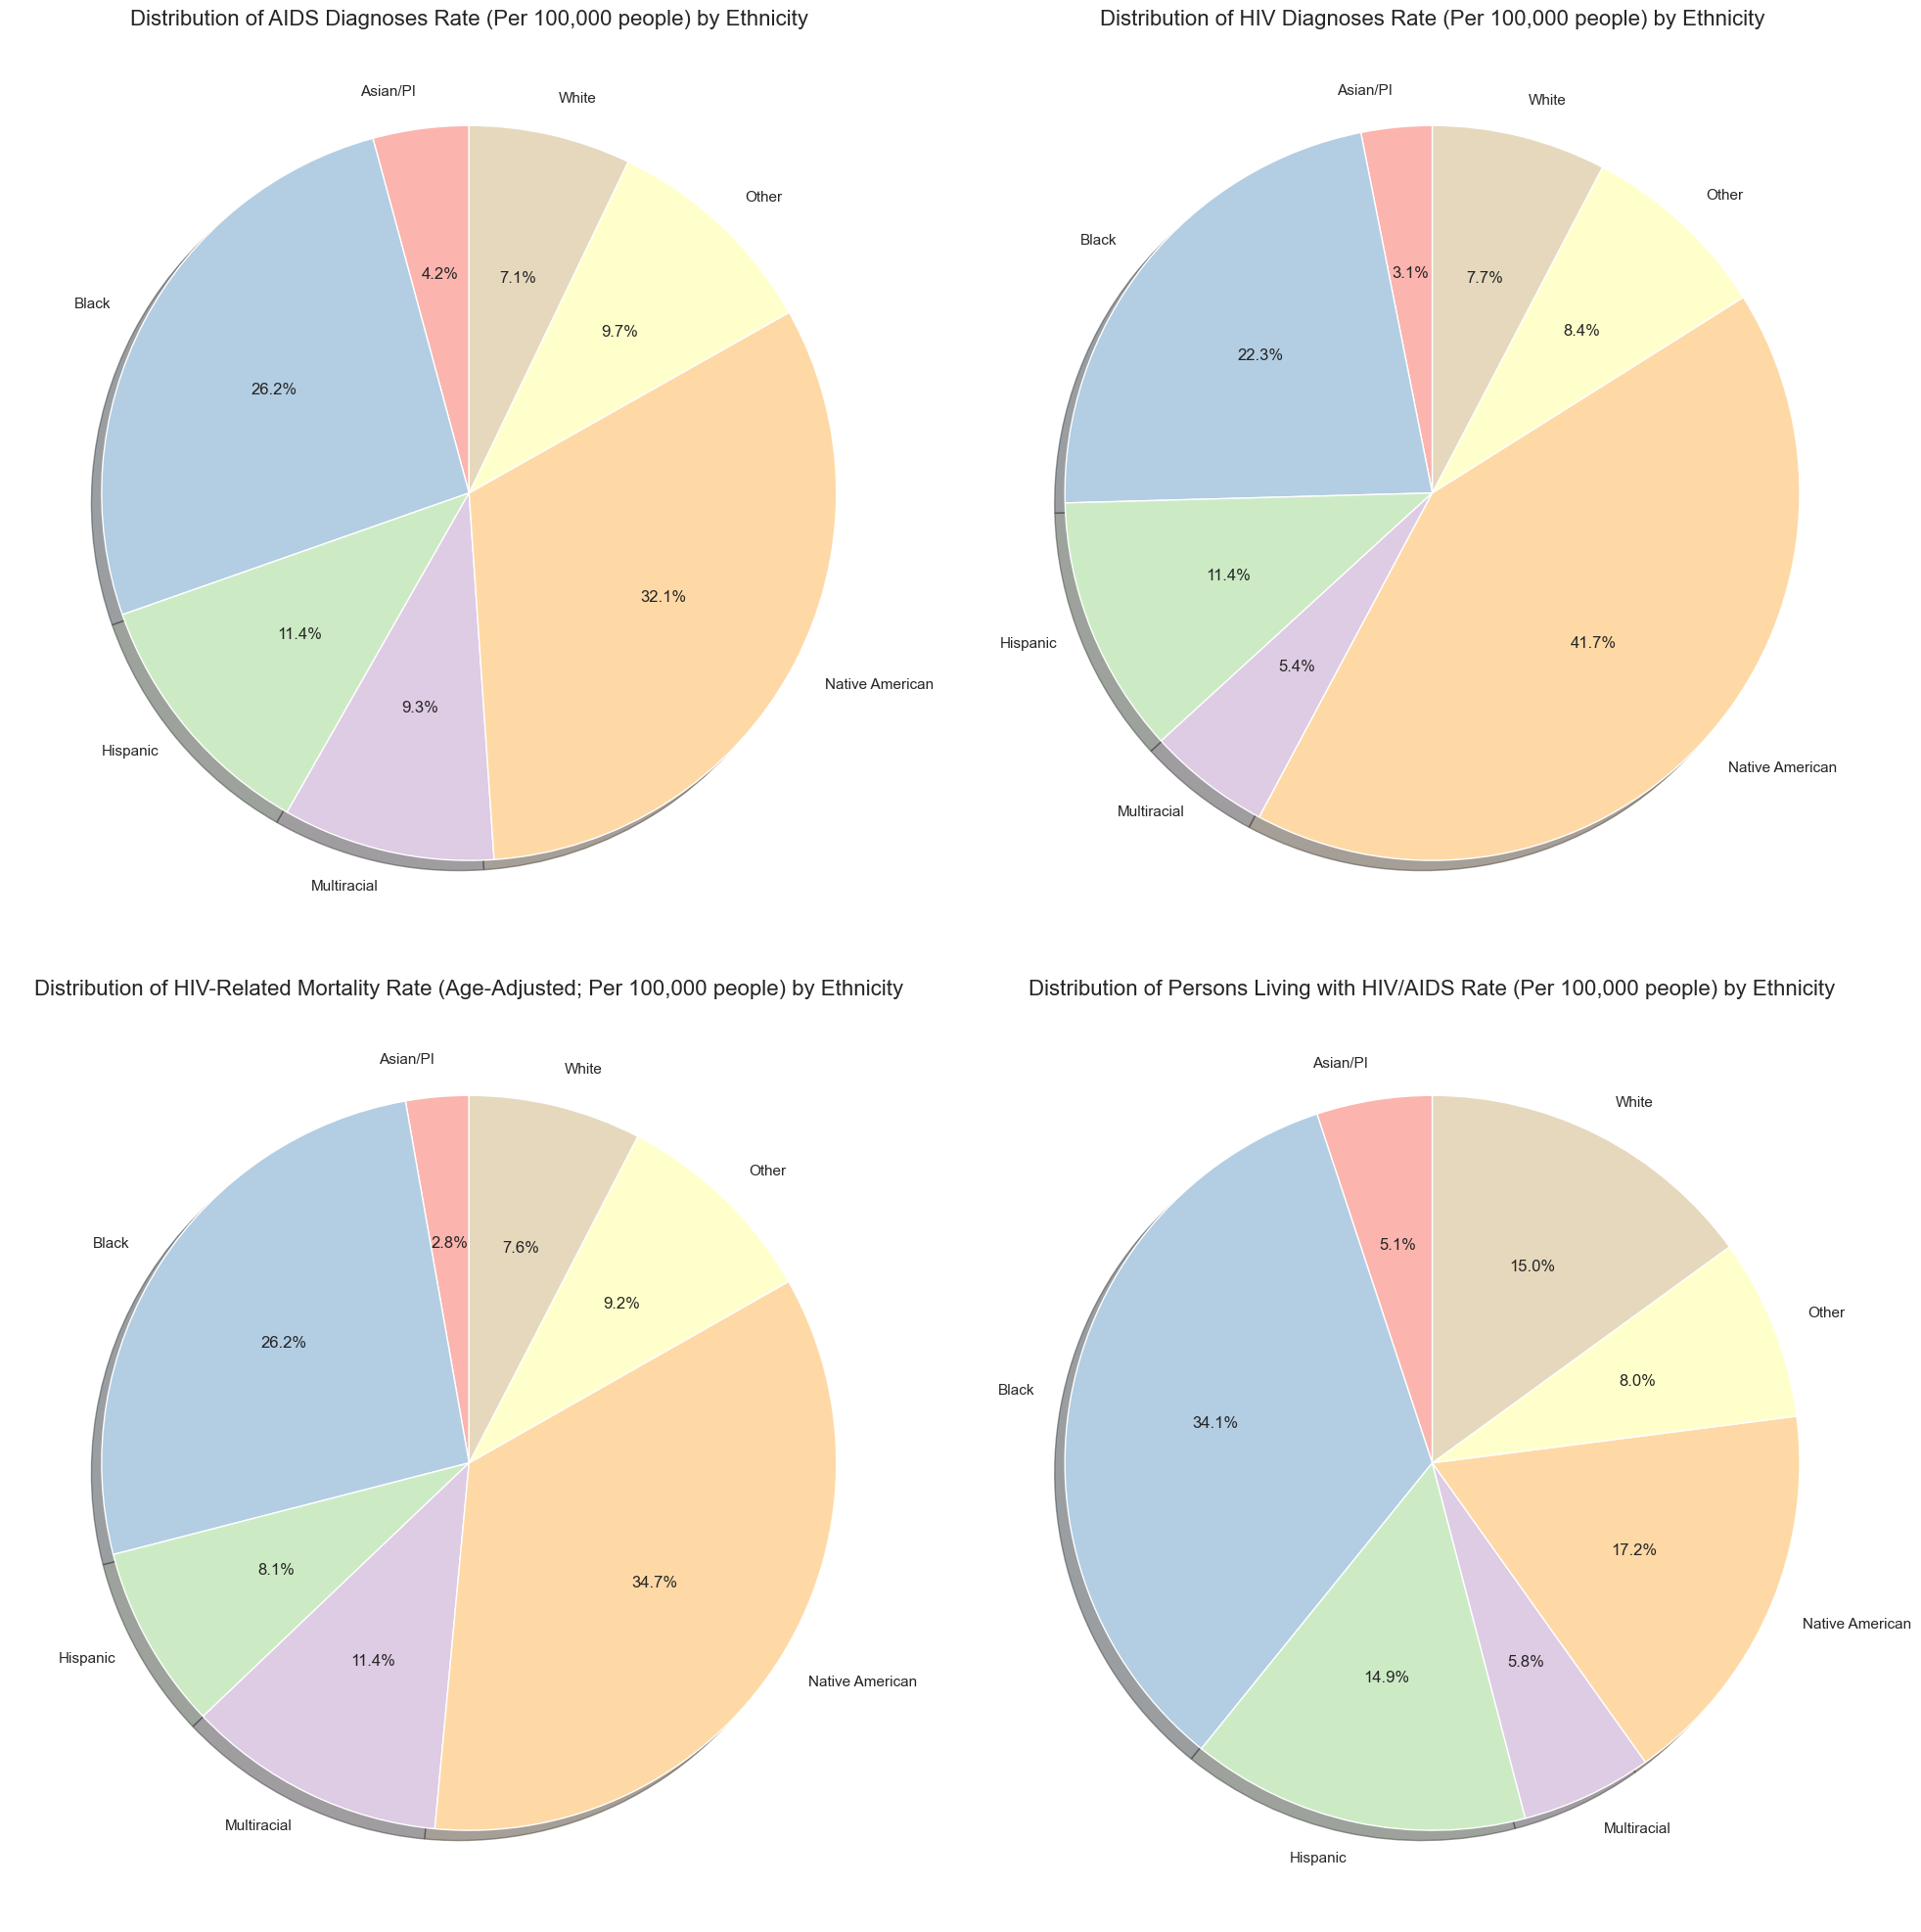

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify  # Treemap plotting library
import re
import matplotlib.colors as mcolors

# Load the dataset
file_path = 'Big_Cities_Health_Data_Inventory.csv'  
data = pd.read_csv(file_path)

# Filter data for HIV/AIDS related indicators and exclude the 'all' category in race/ethnicity
hiv_indicators = [
    'AIDS Diagnoses Rate (Per 100,000 people)',
    'HIV Diagnoses Rate (Per 100,000 people)',
    'HIV-Related Mortality Rate (Age-Adjusted; Per 100,000 people)',
    'Persons Living with HIV/AIDS Rate (Per 100,000 people)'
]
# Set up a 2x2 grid for pie charts
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
axes = axes.flatten()  # Flatten the axes array for easier iteration

for index, indicator in enumerate(hiv_indicators):
    hiv_data_race = data[(data['Indicator'] == indicator) & (data['Race/ Ethnicity'] != 'All')]
    hiv_race_grouped = hiv_data_race.groupby('Race/ Ethnicity')['Value'].mean()
    colors = plt.get_cmap('Pastel1')
    
    # Plot on the respective subplot
    hiv_race_grouped.plot.pie(
        ax=axes[index],
        autopct='%1.1f%%',
        colors=[colors(i) for i in range(len(hiv_race_grouped))],
        startangle=90,
        shadow=True
    )
    axes[index].set_ylabel('')
    axes[index].set_title(f'Distribution of {indicator} by Ethnicity',fontsize=16)

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()



Here we define the indicators and extract state codes from the 'Place' column. We then prepare a 2x2 grid for treemaps, where each treemap represents one of the four indicators, showing the total cases by state. We normalize the data for color mapping to proportionally reflect the magnitude of cases. Color bars are added to each plot to facilitate clear and quantitative data interpretation.

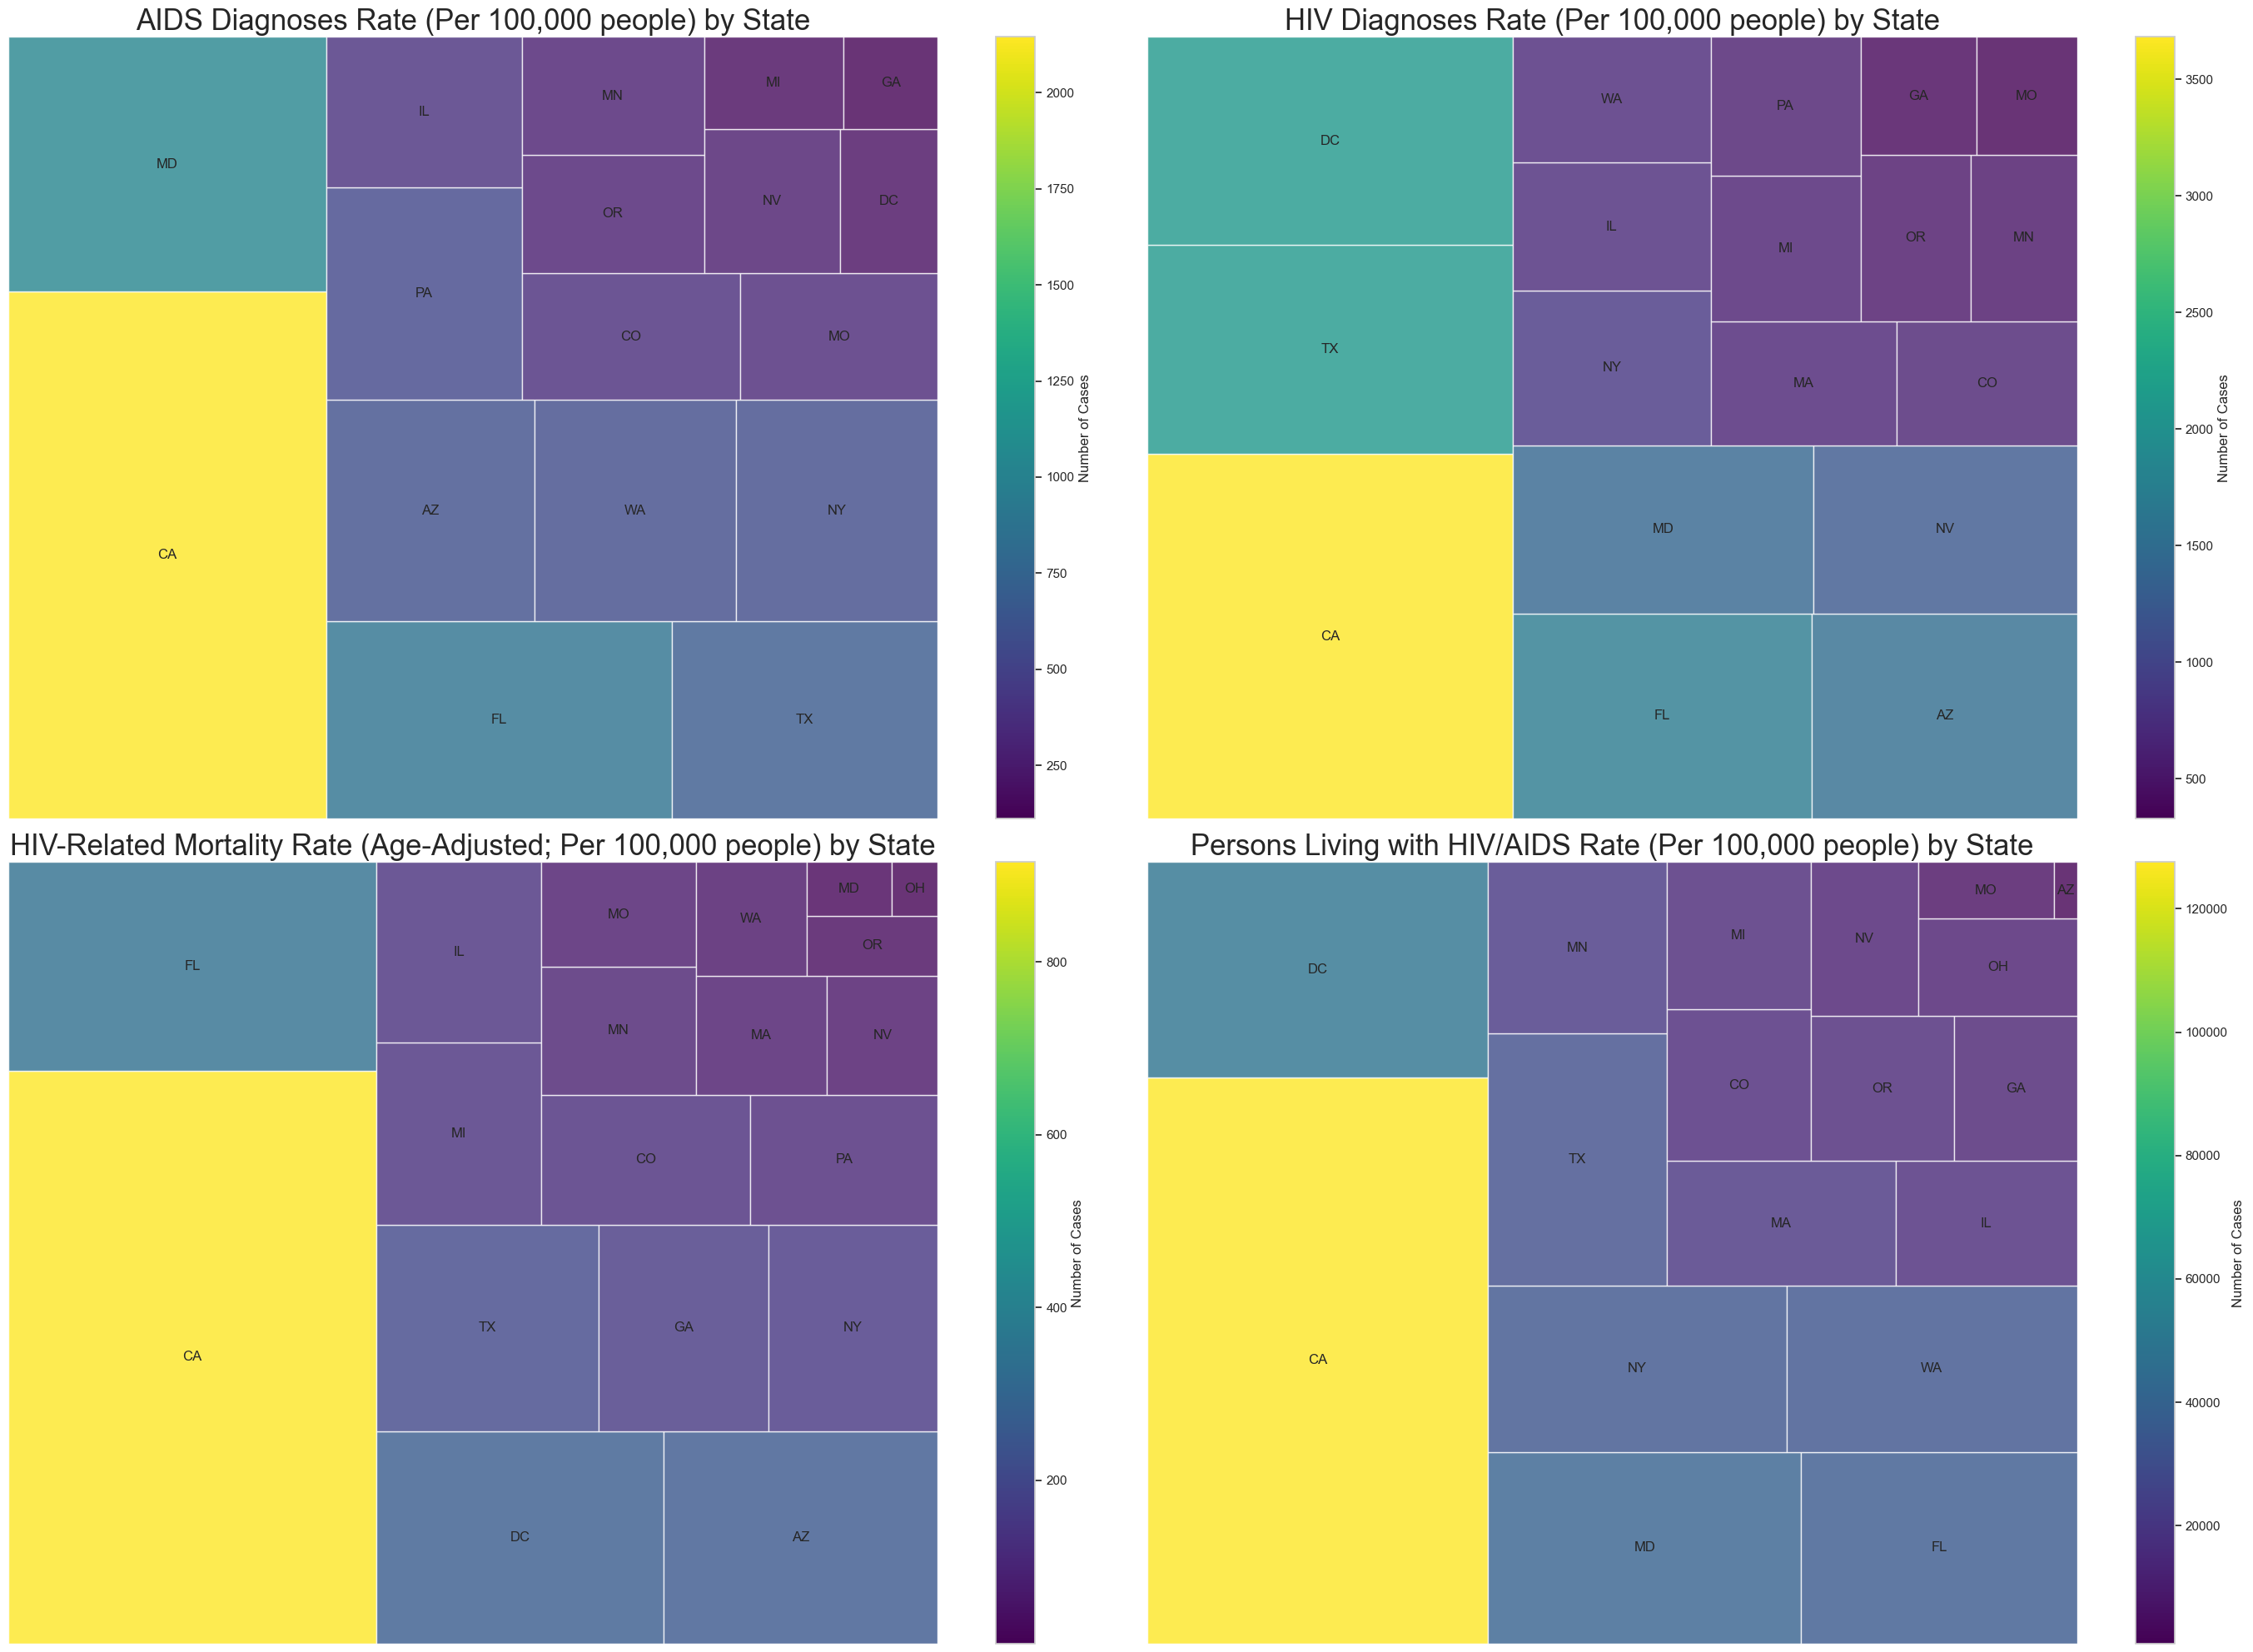

In [56]:




# Function to extract state codes from the 'Place' column
def extract_state(place):
    match = re.search(r'\b[A-Z]{2}\b', place)
    return match.group(0) if match else None

# Adding state codes to the data
data['State'] = data['Place'].apply(extract_state)

# Set up a 2x2 grid for treemaps
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(28, 20))
axes = axes.flatten()  # Flatten the axes array for easier iteration

for index, indicator in enumerate(hiv_indicators):
    state_hiv_data = data[(data['Indicator'] == indicator) & data['State'].notna() & (data['Place'] != 'U.S. Total')]

    # Summarize the data to get total cases by state
    state_hiv_summary = state_hiv_data.groupby('State')['Value'].sum().reset_index().sort_values(by='Value', ascending=False)

    # Normalize data for color mapping
    norm = mcolors.Normalize(vmin=state_hiv_summary['Value'].min(), vmax=state_hiv_summary['Value'].max())
    cmap = plt.cm.viridis
    colors = cmap(norm(state_hiv_summary['Value']))

    # Create treemap in the respective subplot
    squarify.plot(
        sizes=state_hiv_summary['Value'],
        label=state_hiv_summary['State'],
        color=colors,
        alpha=0.8,
        ax=axes[index]
    )
    axes[index].set_title(f'{indicator} by State',fontsize=25)
    axes[index].axis('off')  # Hide the axes

    # Create colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=axes[index], orientation='vertical')
    cbar.set_label('Number of Cases')

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()


Here we configure another 2x2 grid, this time for bar charts that display the total HIV/AIDS cases by gender over different years. We filter, group, and plot the data in bar charts for each indicator, with custom color settings and grid styles that enhance the visual appeal and readability. We adjust titles and labels to be more prominent, improving clarity.

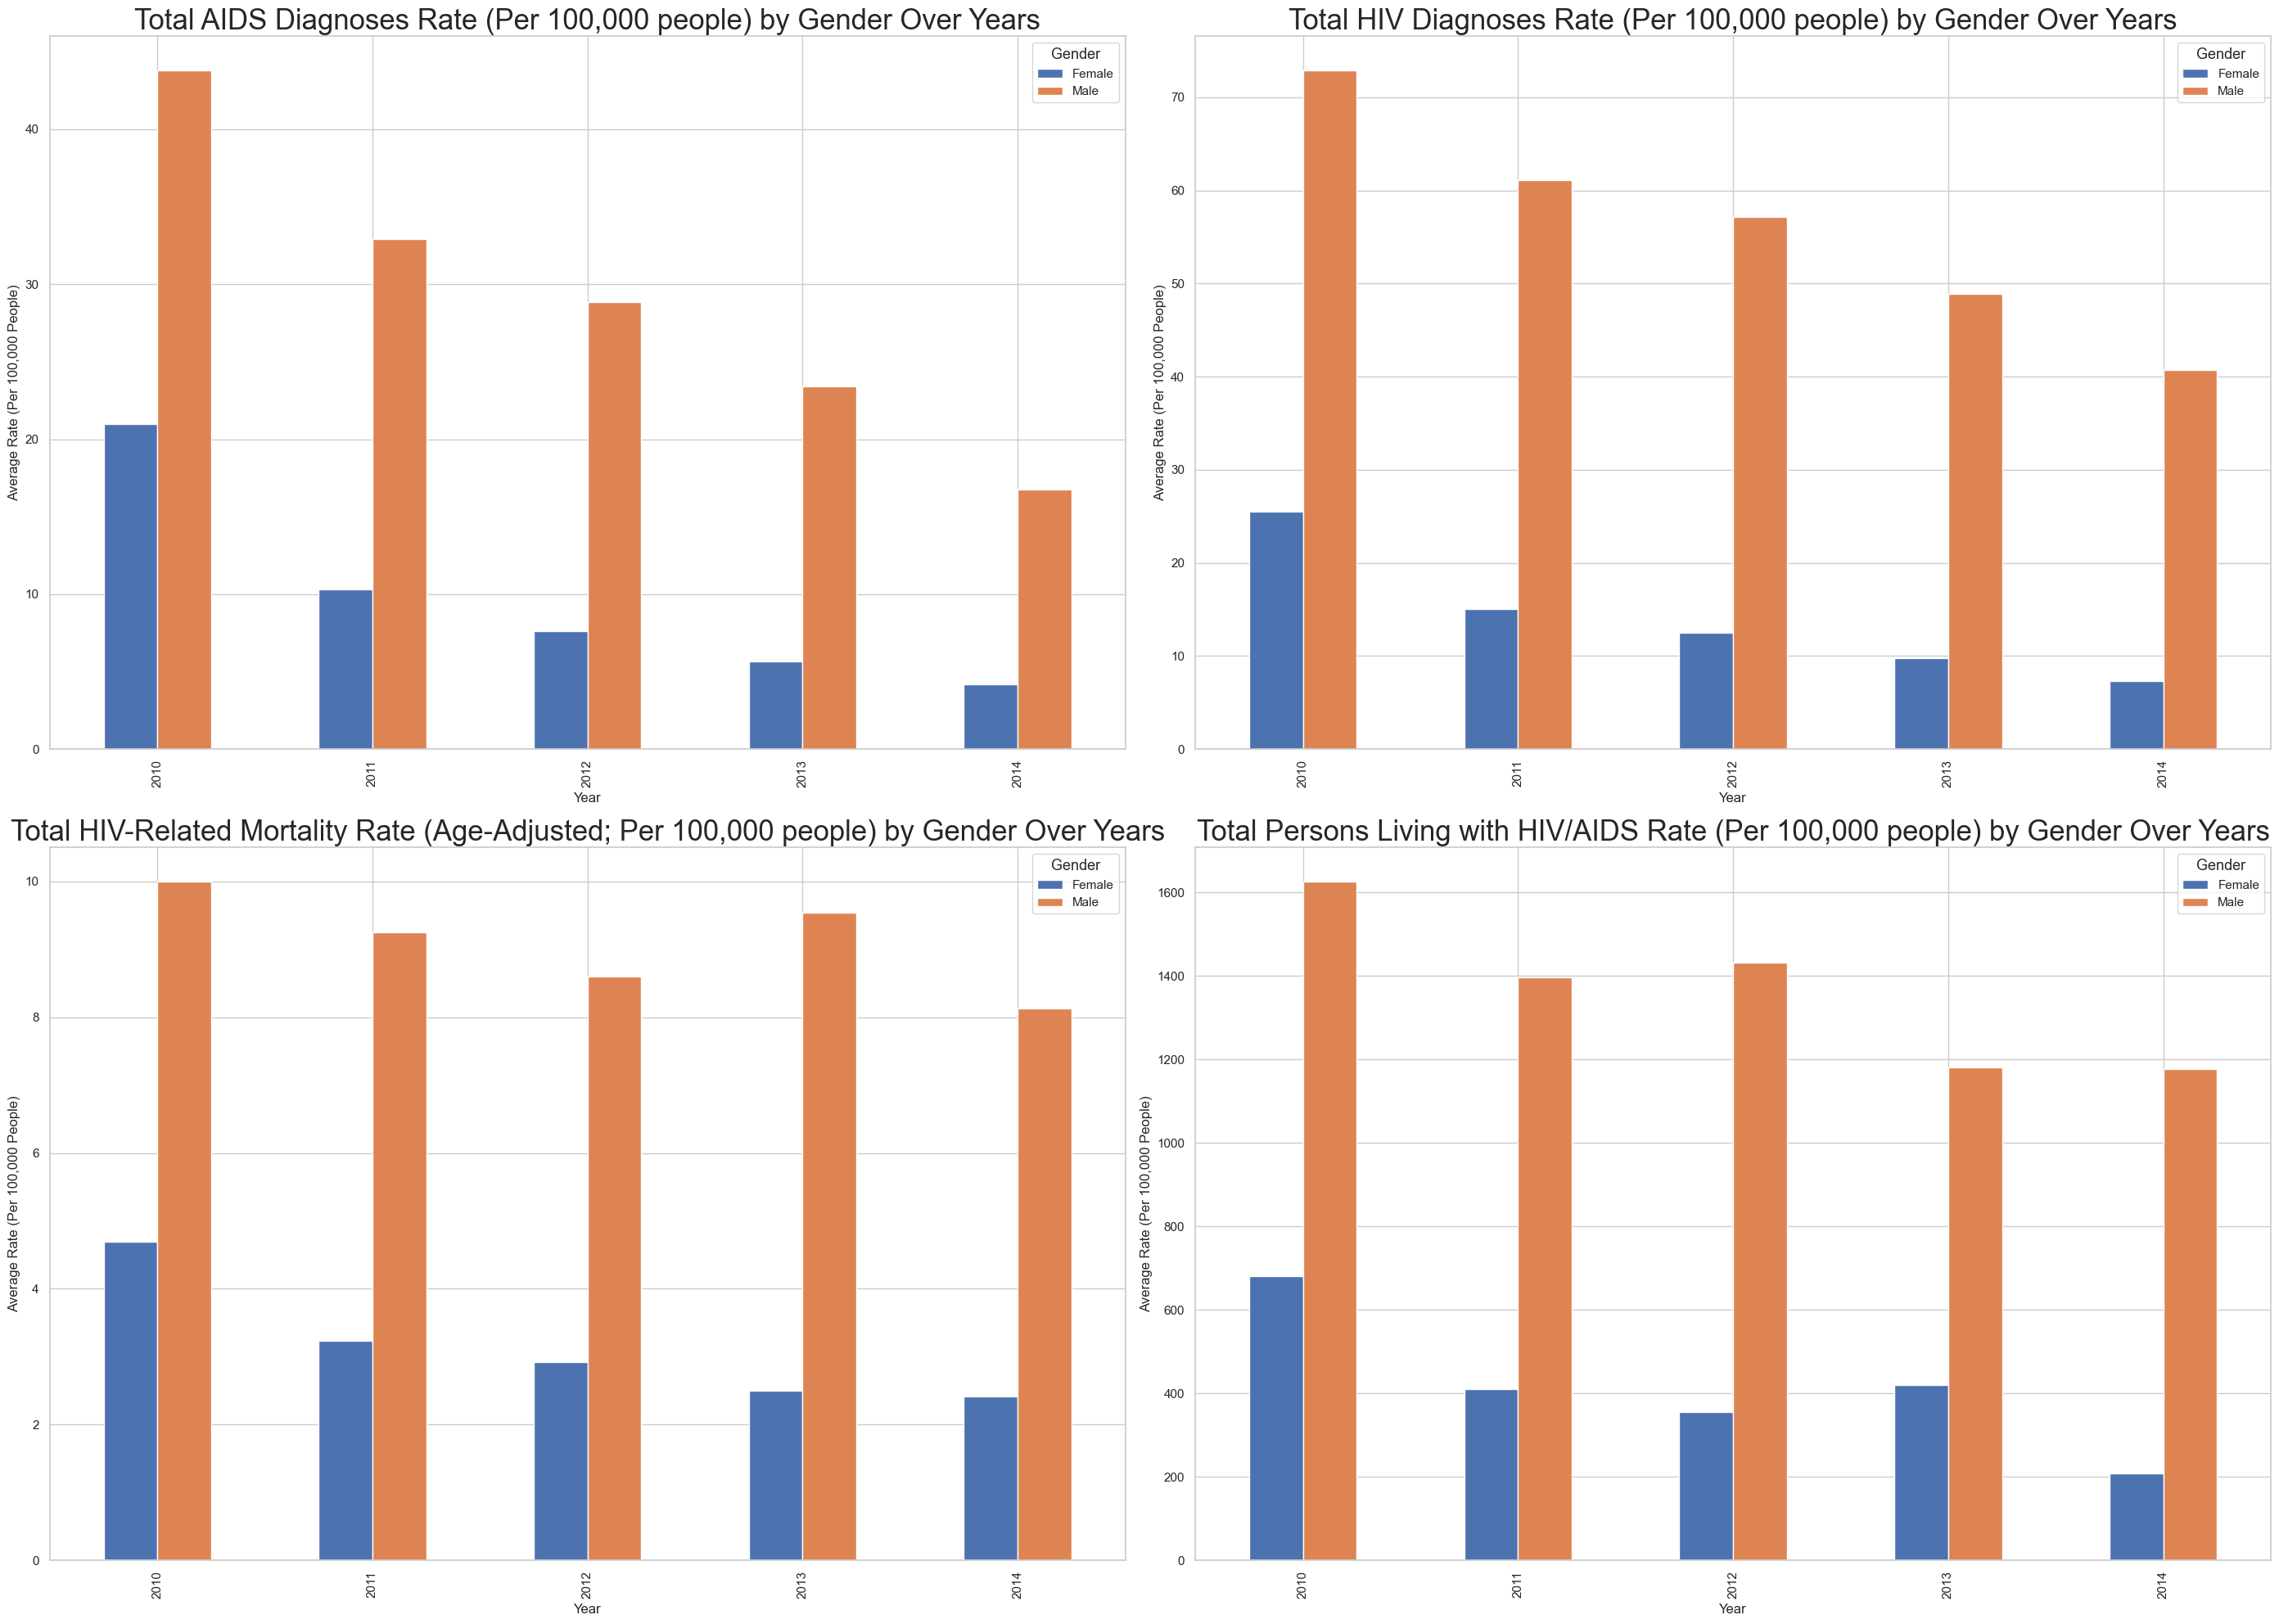

In [57]:


# Function to extract state codes from the 'Place' column
def extract_state(place):
    match = re.search(r'\b[A-Z]{2}\b', place)
    return match.group(0) if match else None

# Adding state codes to the data
data['State'] = data['Place'].apply(extract_state)

# Set up a 2x2 grid for bar charts
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(28, 20))
axes = axes.flatten()  # Flatten the axes array for easier iteration

for index, indicator in enumerate(hiv_indicators):
    # Filter data for the current indicator and non-aggregated gender data
    hiv_data_gender = data[(data['Indicator'] == indicator) & data['Gender'].notna() & (data['Gender'] != 'Both')]
    
    # Grouping data by Year and Gender, then getting the average of values
    hiv_gender_grouped = hiv_data_gender.groupby(['Year', 'Gender'])['Value'].mean().unstack()

    # Creating a bar chart in the respective subplot
    sns.set(style="whitegrid")  # Setting a professional style
    colors = ["#4c72b0", "#dd8452"]  # Professional color scheme for male and female
    hiv_gender_grouped.plot(
        kind='bar', 
        ax=axes[index], 
        color=colors
    )
    axes[index].set_title(f'Total {indicator} by Gender Over Years',fontsize=25)
    axes[index].set_xlabel('Year')
    axes[index].set_ylabel('Average Rate (Per 100,000 People)')
    axes[index].legend(title='Gender', title_fontsize='13', fontsize='11')

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()


Here we use the Python Imaging Library (PIL) to create a composite image that serves as an infographic. We load individual images of the previously created visualizations, arrange them with descriptive texts, and include additional insights related to HIV/AIDS. We then save this infographic to a file, providing a comprehensive visual summary of the data analyzed in the script.

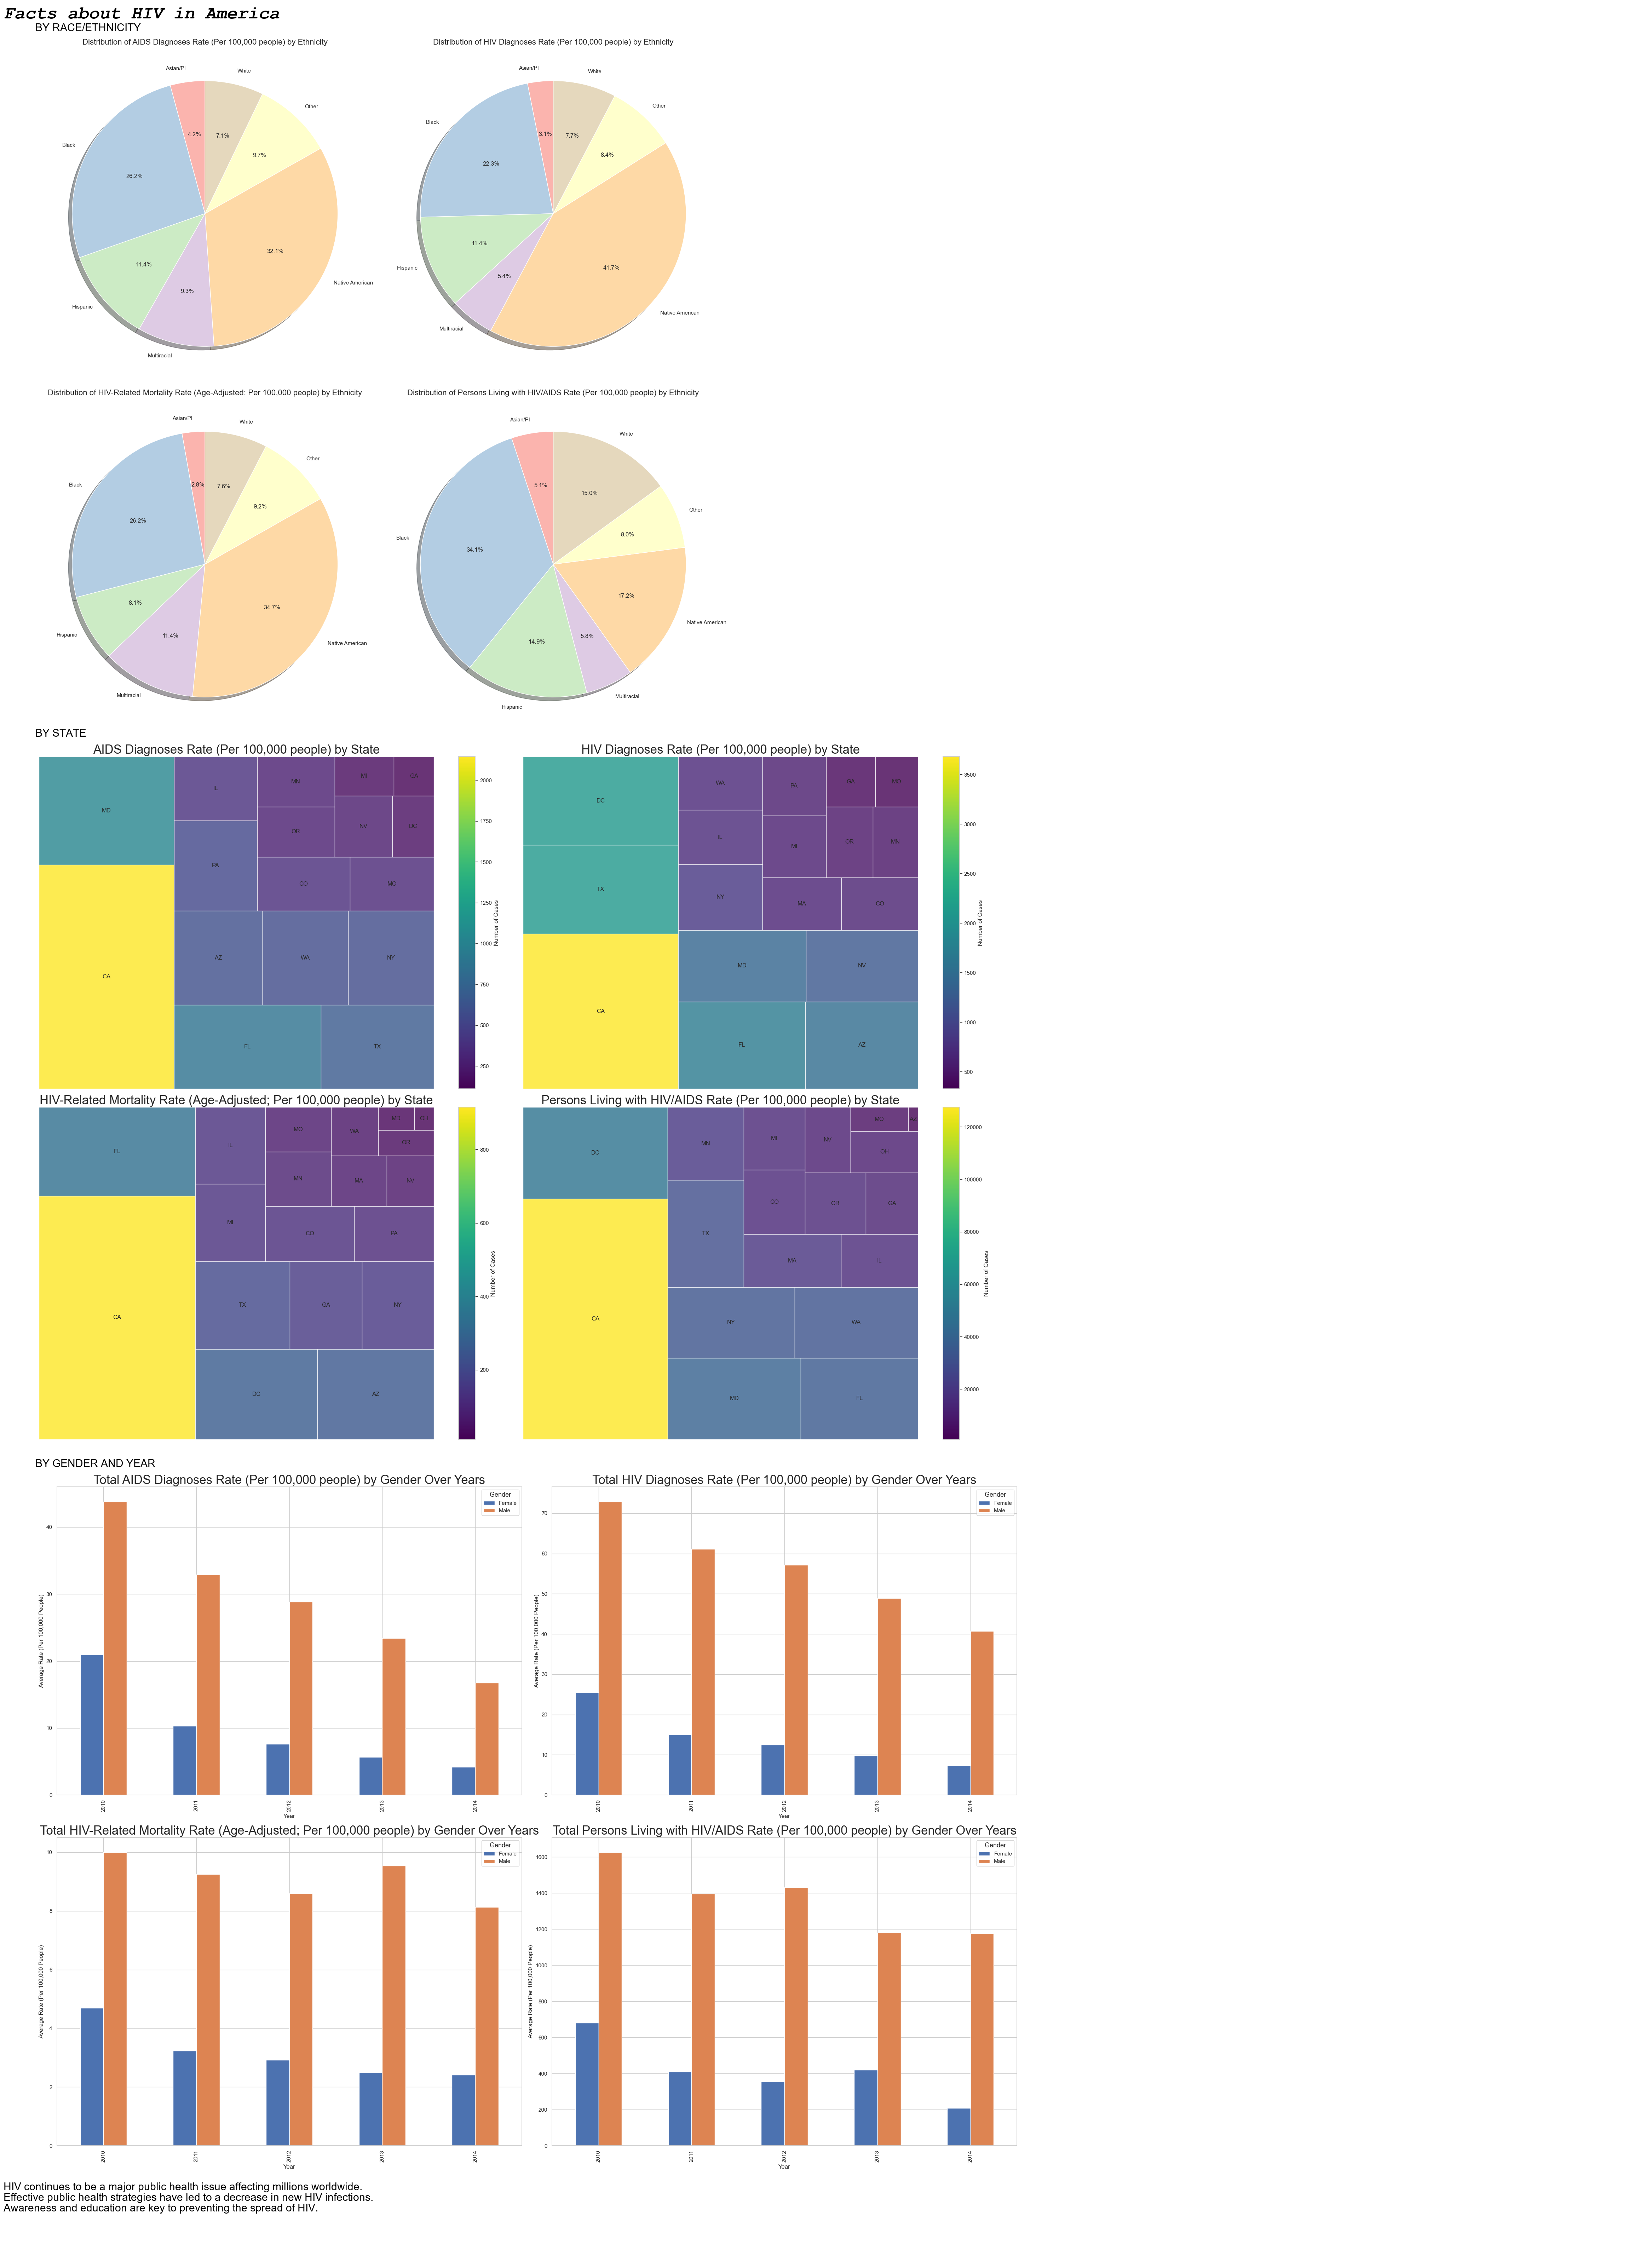

In [53]:
from PIL import Image, ImageDraw, ImageFont

# Load images
hiv_race_pie = Image.open('pie.png')
hiv_state_bar = Image.open('treemap.png')
hiv_gender_bar = Image.open('barchart.png')

# Create a new image for the poster with a yellow background
poster_width = max(hiv_race_pie.width + hiv_state_bar.width, hiv_gender_bar.width)
poster_height = hiv_race_pie.height + hiv_state_bar.height + hiv_gender_bar.height + 400  # additional space for text and title
poster = Image.new('RGB', (poster_width, poster_height), 'white')

# Set up drawing context
draw = ImageDraw.Draw(poster)

# Fonts (You might need to adjust the path if running locally on non-Windows system)
try:
    title_font = ImageFont.truetype("courbi.ttf", 50)
    text_font = ImageFont.truetype("arial.ttf", 30)
except IOError:
    # Fallback if custom font can't be loaded
    title_font = ImageFont.load_default()
    text_font = ImageFont.load_default()

# Insert title
title_text = "Facts about HIV in America"
draw.text((10, 10), title_text, font=title_font, fill='black')

# Define text and positions
texts = [
    "BY RACE/ETHNICITY",
    "BY STATE",
    "BY GENDER AND YEAR"
]
images = [hiv_race_pie, hiv_state_bar, hiv_gender_bar]
y_offsets = [100, hiv_race_pie.height + 120, hiv_race_pie.height + hiv_state_bar.height + 200]
# Annotate and place images
for img, text, y_offset in zip(images, texts, y_offsets):
    # Place image
    poster.paste(img, (100, y_offset))
    
    # Add text
    draw.text((100, y_offset - 40), text, font=text_font, fill='black')

# Additional quotes or insights
insights = [
    "HIV continues to be a major public health issue affecting millions worldwide.",
    "Effective public health strategies have led to a decrease in new HIV infections.",
    "Awareness and education are key to preventing the spread of HIV."
]
y_text_offset = y_offsets[-1] + images[-1].height + 20

for insight in insights:
    draw.text((10, y_text_offset), insight, font=text_font, fill='black')
    y_text_offset += 30

# Save the final poster
poster_path = 'HIV_Facts_Infographic.png'
poster.save(poster_path)
Image.open('HIV_Facts_Infographic.png')



The pie charts clearly demonstrate that Native Americans and Blacks are disproportionately affected by HIV and AIDS, indicating higher prevalence rates within these ethnic groups compared to Whites and Asians, who are among the least affected. This disparity may reflect various socio-economic factors, including access to healthcare, education on prevention, and possibly stigmatization within communities which can affect testing and treatment.

The bar charts depict a significant gender disparity, with males being more affected by HIV than females. This trend is often related to higher rates of HIV among men who have sex with men (MSM), a group that historically faces higher HIV prevalence. This points towards the need for targeted interventions within this community, including education, testing, and treatment options that are accessible and non-stigmatizing.

The heatmap visualization of states like California, which shows a higher rate of HIV diagnoses, correlates with states known to have larger LGBTQ+ populations. These states often have more comprehensive reporting and may have better healthcare engagement within these communities, which could result in higher diagnosed cases being reported. This does not necessarily mean these states have higher rates of transmission, but rather that their reporting and diagnosis efforts are more robust. 

Discussing the potential biases in reporting, states with larger gay populations and those governed by Democratic policies might have better healthcare systems that encourage testing and reporting, hence showing higher numbers. Conversely, Republican states might have underreporting due to different social stigmas or less proactive healthcare policies regarding HIV prevention and treatment, leading to lower apparent rates of HIV/AIDS.

These observations highlight the complexities of interpreting epidemiological data, where social, political, and economic factors all play significant roles in the dynamics of disease prevalence and reporting.